In [77]:
"""
1. Python과 OpenCV로 이밎 외곽 찾기, 이지미 자르기, 원하는 부분만 자동으로 잘라내기

모델을 만들 때 잘 정제된 학습 데이터를 쓰는 것과 그렇지 않은 것으로 학습 시킨 모델에 차이가 있기 떄문에 중요하다.

목표틑 OpenCV와 Python을 이용해 원하는 부분만 잘라내는 것.

"""

'\n1. Python과 OpenCV로 이밎 외곽 찾기, 이지미 자르기, 원하는 부분만 자동으로 잘라내기\n\n모델을 만들 때 잘 정제된 학습 데이터를 쓰는 것과 그렇지 않은 것으로 학습 시킨 모델에 차이가 있기 떄문에 중요하다.\n\n목표틑 OpenCV와 Python을 이용해 원하는 부분만 잘라내는 것.\n\n'

In [78]:
import cv2,sys
from matplotlib import pyplot as plt
import numpy as np
"""
우선 이미지 처리를 위해 cv2와 파일을 읽어오고 저장하기 위해 sys를 import 해준다.
이미지 확인을 위해 matplotlib의 pyplot을 import
리스트 배열을 넘파이로 처리하기 위해 numpy 사용
"""
imgPath = "C:/Users/gridone/Desktop/imagesdata/test_2.png"

In [79]:
img = cv2.imread(imgPath)
image_gray = cv2.imread(imgPath,cv2.IMREAD_GRAYSCALE)
"""
cv2의 imread()를 이용해 해당 경로의 이미지를 읽어 온다.
원본과 흑백으로 읽어 온다.
"""

'\ncv2의 imread()를 이용해 해당 경로의 이미지를 읽어 온다.\n원본과 흑백으로 읽어 온다.\n'

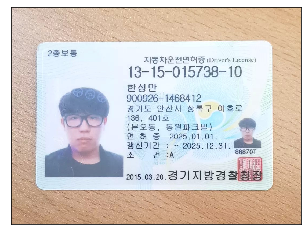

'\n읽어온 이미지는 r,g,b 세층으로 이루어져 있는데 이를 분리하면 순서대로 b,g,r 층이 되므로 이를 변수에 담아 다시 순서대로 r,g,b 순으로 img2에 담는다\n그 후 파이플롯으로 해당 이미지를 띄운다.\n'

In [80]:
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])

plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.show()
"""
읽어온 이미지는 r,g,b 세층으로 이루어져 있는데 이를 분리하면 순서대로 b,g,r 층이 되므로 이를 변수에 담아 다시 순서대로 r,g,b 순으로 img2에 담는다
그 후 파이플롯으로 해당 이미지를 띄운다.
"""

In [81]:
"""
cv2.imshow('image1', img)
cv2.imshow('image2', img2)
cv2.imshow('image_gray', image_gray)
 
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

"\ncv2.imshow('image1', img)\ncv2.imshow('image2', img2)\ncv2.imshow('image_gray', image_gray)\n \ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

In [82]:
"""
이제 부터 이미지에 화장품만 가져오기 위해 가우시안 블러를 사용한다.
블러는 이미지를 부드럽게 하기 떄문에 배경과 원하지 않는 부분을 부드럽게 하여 해당 경계를 찾지 못하게 하기 위함이다.
블러 처리를 심하게 하면 원래 찾고자 하는 대상을 찾지 못하게 되고, 블러가 약하면 배경의 외좍도 포함되므로 ksize를 적당히 조절해야 한다.
"""

'\n이제 부터 이미지에 화장품만 가져오기 위해 가우시안 블러를 사용한다.\n블러는 이미지를 부드럽게 하기 떄문에 배경과 원하지 않는 부분을 부드럽게 하여 해당 경계를 찾지 못하게 하기 위함이다.\n블러 처리를 심하게 하면 원래 찾고자 하는 대상을 찾지 못하게 되고, 블러가 약하면 배경의 외좍도 포함되므로 ksize를 적당히 조절해야 한다.\n'

In [83]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=4)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [84]:
edged = cv2.Canny(blur, 10, 200)

In [85]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

In [86]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
total = 0

In [87]:
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
#contours_image = cv2.drawContours(img, contours, -1, (0,255,0), 3)
#cv2.imshow('contours_image', contours_image)

In [88]:
contours_xy = np.array(contours)
contours_xy.shape

(73,)

In [89]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


72
976
162
685


In [90]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [91]:
img_trim = img[y:y+h, x:x+w]
cv2.imwrite('C:/Users/gridone/Desktop/imagesdata/org_trim_5.jpg', img_trim)
#org_image = cv2.imread('org_trim.jpg')

True

In [92]:
#cv2.imshow('org_image', org_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()